In [1]:
import numpy as np
import pandas as pd
import matplotlib as mp
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('NBADataPlayoffResults.csv')

In [3]:
df.head()

,TEAM,PACE,PACEvsLA,AST,TO,ORR,DRR,REBR,EFF FG%,EFFFGvsLA,TS%,TSvsLA,OFF EFF,OFFEFFvsLA,DEF EFF,DEFEFFvsLA,NET EFF,Result,Season
0,Brooklyn,101.8,0.38,19.5,12.2,21.4,77.6,50.8,57.5,3.7,61.0,3.82,116.3,6.4,110.6,0.7,5.7,2,2021
1,LA Clippers,99.1,-2.32,18.4,12.2,22.7,79.5,51.7,56.4,2.6,59.9,2.72,115.2,5.3,108.7,-1.2,6.5,3,2021
2,Utah,100.8,-0.62,17.5,12.7,24.5,78.7,53.1,56.3,2.5,59.7,2.52,115.1,5.2,105.7,-4.2,9.4,2,2021
3,Phoenix,99.3,-2.12,19.8,11.5,20.8,78.7,50.1,56.4,2.6,59.7,2.52,114.9,5.0,108.8,-1.1,6.1,4,2021
4,Portland,100.8,-0.62,16.0,9.9,23.0,76.3,49.5,54.0,0.2,57.7,0.52,114.9,5.0,113.4,3.5,1.5,1,2021


In [4]:
X = df[df['Result'] != 0].drop(columns = ['PACE', 'EFF FG%', 'TS%','OFF EFF','DEF EFF','TEAM', 'Season', 'EFFFGvsLA'])

In [5]:
X.head()

,PACEvsLA,AST,TO,ORR,DRR,REBR,TSvsLA,OFFEFFvsLA,DEFEFFvsLA,NET EFF,Result
0,0.38,19.5,12.2,21.4,77.6,50.8,3.82,6.4,0.7,5.7,2
1,-2.32,18.4,12.2,22.7,79.5,51.7,2.72,5.3,-1.2,6.5,3
2,-0.62,17.5,12.7,24.5,78.7,53.1,2.52,5.2,-4.2,9.4,2
3,-2.12,19.8,11.5,20.8,78.7,50.1,2.52,5.0,-1.1,6.1,4
4,-0.62,16.0,9.9,23.0,76.3,49.5,0.52,5.0,3.5,1.5,1


In [6]:
y = X['Result']

In [7]:
X = X.drop(columns = ['Result'])

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.3, random_state = 42)

In [10]:
from sklearn.model_selection import GridSearchCV

In [11]:
from sklearn.ensemble import RandomForestClassifier

In [12]:
n_estimators = [64,100,128,200]

In [13]:
max_features = [2,3,4,5,6]

In [14]:
bootstrap = [True, False]

In [15]:
param_grid = {'n_estimators':n_estimators, 'max_features': max_features, 'bootstrap': bootstrap}

In [16]:
nbaprrfc = RandomForestClassifier()

In [17]:
grid = GridSearchCV(nbaprrfc, param_grid)

In [18]:
grid.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'max_features': [2, 3, 4, 5, 6],
                         'n_estimators': [64, 100, 128, 200]})

In [19]:
grid.best_params_

{'bootstrap': False, 'max_features': 3, 'n_estimators': 200}

In [20]:
predictions = grid.predict(X_test)

In [21]:
from sklearn.metrics import plot_confusion_matrix, classification_report

In [22]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           1       0.89      0.94      0.91        17
           2       0.20      0.17      0.18         6
           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00         1
           5       0.25      1.00      0.40         1

    accuracy                           0.62        29
   macro avg       0.27      0.42      0.30        29
weighted avg       0.57      0.62      0.59        29



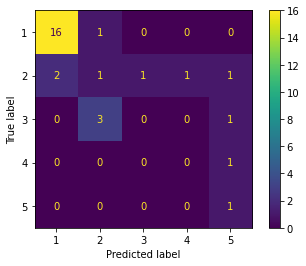

In [23]:
plot_confusion_matrix(grid, X_test, y_test)